# Make an Excel Ray file for Zemax


- Geometry : Auxiliary Telescope Geometry of Optical for CTIO 0.9 m 

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : April 21th 2017


Simple 2D optical geometry for the optical setup of CTIO 0.9m telescope with Ronchi Grating.
This is a tool to adjust the CCD position wrt Filter wheel to obtained a


This is a python notebook (not a sagemath notebook)
- command:
** ipython notebook **

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


## Output filename and desired wavelength

In [3]:
root_filename="Zemax_Rayfile_"

In [4]:
# number of rays
NBEAM_X=5
NBEAM_Y=5
NBEAM=NBEAM_X*NBEAM_Y

In [5]:
Wavelength=0.0004
WL=int(1000000.*Wavelength)

In [6]:
theta_x=0.  # angle in arcmin
theta_y=0.  # angle in arcmin 

In [7]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

In [8]:
Rayfile="Zemax_Rayfile_{:d}_{:d}nm_{:d}_{:d}.xlsx".format(NBEAM,WL,theta_x_num,theta_y_num)

In [9]:
Rayfile

'Zemax_Rayfile_25_400nm_0_0.xlsx'

## Constants for conversions

In [10]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [11]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [12]:
deg_to_rad=np.pi/180.

In [13]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_ro_rad=1./rad_to_arcmin

## Configuration parameters at the telescope
--------------------------------------------------------

#### Telescope

In [14]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    

In [15]:
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### Filter

In [16]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

In [17]:
Filt_size

76.19999999999999

#### CCD Detector

In [18]:
Det_xpic=24.0 # microns per pixel
Det_NbPix=2048 # number of pixels per CCD side
Det_size=Det_xpic*Det_NbPix*1e-3 # CCD size in mm, 5 cm or 2 inches

In [19]:
Det_size

49.152

In [20]:
Det_pix_angl=Det_xpic*micr_to_m/Tel_Focal_Length   # in radian

In [21]:
print "pixel viewing angle in arcsec = ", Det_pix_angl*rad_to_deg*arcdeg_to_arcsec

pixel viewing angle in arcsec =  0.392885345233


## Location of the source in the field of view

The Field of view of the delescope is 13.6 arcmin


- ($\theta_x, \theta_y$) in arcmin to be specified
- ($\alpha_x, \alpha_y$) in radian calculated 

In [22]:
theta_max=13.6/2.
theta_max=-13.6/2.

In [23]:
alpha_x=theta_x*arcmin_ro_rad
alpha_y=theta_y*arcmin_ro_rad

## Where to start the tracking of rays

- Units in mm
- The origin is where the optical effective conveging system start at O(0,0,0)
- (X0,Y0,Z0) : coordinates of Beam rays starting points

In [24]:
D0=Filt_D*m_to_mm  # distance between plane where the trcking beam start

In [25]:
Z0=Tel_Focal_Length*m_to_mm

In [26]:
Z1=Z0-2.*D0  # please set where you want to start the beam

In [27]:
XMIN=-Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))
XMAX=Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))

In [28]:
YMIN=-Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))
YMAX=Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))

# Number of points

In [29]:
X = np.linspace(XMIN, XMAX, NBEAM_X)
Y = np.linspace(YMIN, YMAX, NBEAM_Y)
XX, YY = np.meshgrid(X, Y)

In [30]:
pts = itertools.product(X, Y)

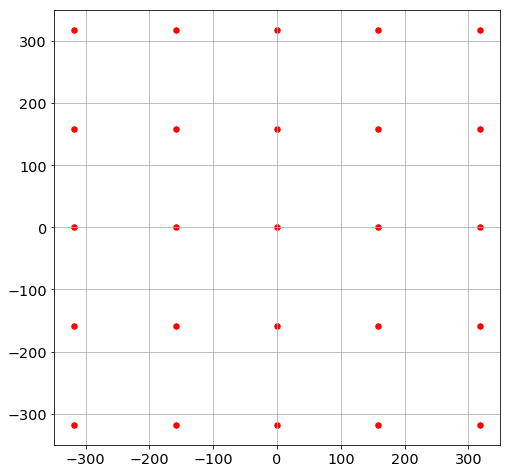

In [31]:
plt.grid()
plt.scatter(*zip(*pts), marker='o', s=30, color='red')

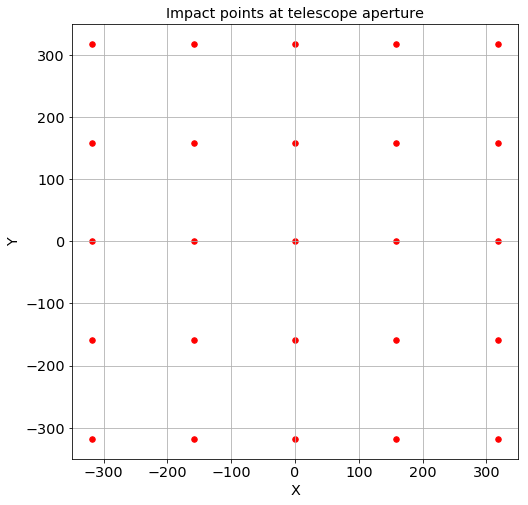

In [32]:
plt.scatter(XX,YY, marker='o', s=30, color='red')
#plt.ylim(YMIN,YMAX)
#plt.xlim(XMIN,XMAX)
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Impact points at telescope aperture")

In [33]:
def GetCosinusDirector(X,Y,thealpha_x,thealpha_y,f):
    """
    The size of X,Y is the number of Rays
    """
    
    Norm=np.sqrt( np.power(X+f*np.tan(thealpha_x),2) + np.power(Y+f*np.tan(thealpha_y),2)+ f**2)
    UX=-(X+f*np.tan(thealpha_x))/Norm
    UY=-(Y+f*np.tan(thealpha_y))/Norm
    UZ=f/Norm
    return UX,UY,UZ    
    

In [34]:
UX,UY,UZ=GetCosinusDirector(XX,YY,alpha_x,alpha_y,Z0)

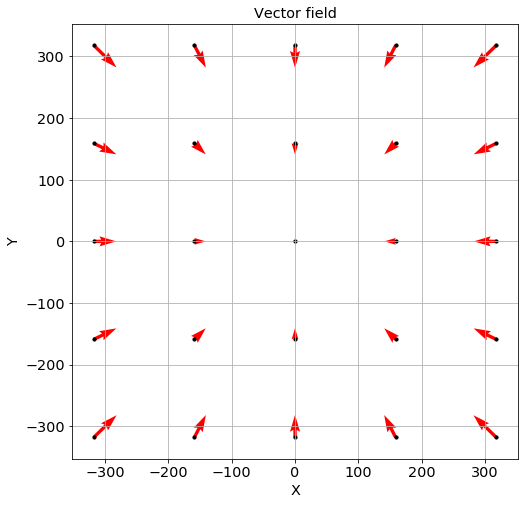

In [35]:
plt.grid()
q = plt.quiver(XX,YY,UX,UY,angles='xy',scale=0.5,color='r')
plt.scatter(XX,YY, marker='o', s=10, color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Vector field")

In [36]:
def GetStartingPoint(X,Y,thealpha_x,the_alpha_y,f,Z0):
    theX0=(1-Z0/f)*X-Z0*np.tan(alpha_x)
    theY0=(1-Z0/f)*Y-Z0*np.tan(alpha_y)
    return theX0,theY0    

In [37]:
(X0,Y0)=GetStartingPoint(XX,YY,alpha_x,alpha_y,Z0,Z1)

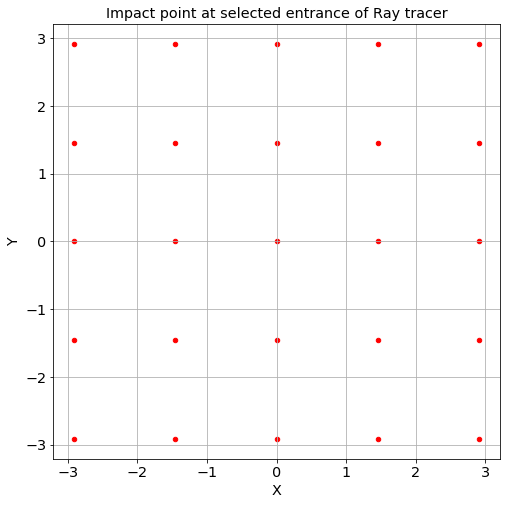

In [38]:
plt.scatter(X0,Y0, marker='o', s=20, color='red')
plt.grid()
#plt.ylim(YMIN,YMAX)
#plt.xlim(XMIN,XMAX)

#plt.xlim(-Filt_size/2, Filt_size/2)
#plt.ylim(-Filt_size/2, Filt_size/2)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Impact point at selected entrance of Ray tracer")

## Create Dataframe

In [39]:
df = pd.DataFrame()

In [40]:
Xout=X0.flatten()
Yout=Y0.flatten()

In [41]:
Uout=UX.flatten()
Vout=UY.flatten()
Wout=UZ.flatten()

In [42]:
Zout=np.zeros(NBEAM)

In [43]:
Wave=Wavelength*np.ones(NBEAM)

In [44]:
df["X0"]=Xout
df["Y0"]=Yout
df["Z0"]=Zout
df["U0"]=Uout
df["V0"]=Vout
df["W0"]=Wout
df["wave"]=Wave

In [45]:
df

,X0,Y0,Z0,U0,V0,W0,wave
0,-2.913785,-2.913785,0.0,0.025238,0.025238,0.999363,0.0004
1,-1.456893,-2.913785,0.0,0.012622,0.025244,0.999602,0.0004
2,0.000000,-2.913785,0.0,-0.000000,0.025246,0.999681,0.0004
3,1.456893,-2.913785,0.0,-0.012622,0.025244,0.999602,0.0004
4,2.913785,-2.913785,0.0,-0.025238,0.025238,0.999363,0.0004
5,-2.913785,-1.456893,0.0,0.025244,0.012622,0.999602,0.0004
6,-1.456893,-1.456893,0.0,0.012625,0.012625,0.999841,0.0004
7,0.000000,-1.456893,0.0,-0.000000,0.012626,0.999920,0.0004
8,1.456893,-1.456893,0.0,-0.012625,0.012625,0.999841,0.0004
9,2.913785,-1.456893,0.0,-0.025244,0.012622,0.999602,0.0004


In [46]:
df.to_excel(Rayfile)

In [47]:
Filt_size

76.19999999999999

In [48]:
2*Filt_D*m_to_mm

115.38

In [49]:
Z0

12600.0

In [50]:
Z1

12484.62

In [51]:
Z0-Z1

115.3799999999992

In [52]:
D0

57.69